# FINAL REPORT
## Comparing the Types of Vehicles in Nuremberg and Wroclaw Public Transport System

### 1. Introduction:
This project is built to compare the types of vehicles and the number of stops for each mode of transport available in two cities, Nuremberg and Wroclaw.

I have addressed the following problems or questions in this project:

* What are the modes of transport available in Nuremberg?
* What are the modes of transport available in Wroclaw?
* Comparison of the modes of transport in both cities.
* Visualization of the stops on the map of both cities.
* Conclusion

### 2. Data Source

For this project, I used two datasets. one from Mobilithek and second one is from kaggle
1. Dataset 1 : Nuremberg public transport data : https://mobilithek.info/offers/-6228947429763481687
2. Dataset 2 : Wroclaw problem transport data : https://www.kaggle.com/datasets/pieca111/wroclaw-public-transport

### 3. Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [ ]:
%pip install pandas
%pip install numpy
%pip install openpyxl
%pip install sqlalchemy
%pip install matplotlib

### 4. Load data
Create a pandas dataframe using the local sqlite file.

In [68]:
import pandas as pd
import sqlite3

con = sqlite3.connect("wroclaw_nuremberg_public_transport.sqlite")
wroclawDataFrame = pd.read_sql_query("SELECT * from wroclaw_data", con)
nurembergDataFrame = pd.read_sql_query("SELECT * from nuremberg_data", con)
con.close()


### 5. What are the modes of transport available in Nuremberg?

To gain clear insights, I have plotted the data of modes of transport in Nuremberg on both a bar chart and a pie chart.

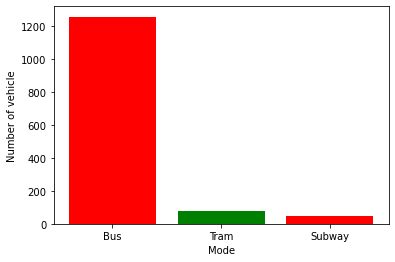

We can see Nuremberg has Buses, Trams and Subways(U)
Number of Stops (BUS) : 1257
Number of Stops (TRAM) : 80
Number of Stops (Subway) : 48


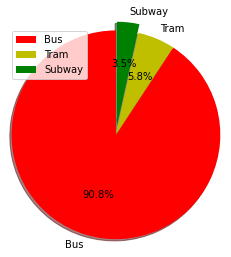

We can observe that buses occupy 90.8% of the transportation modes in Nuremberg, while trams have a share of 5.8% and the subway accounts for 3.5%.


In [76]:

import matplotlib.pyplot as plt
aa = nurembergDataFrame.groupby('Betriebszweig')['VAGKennung'].nunique()
left = [1, 2, 3]
height = aa
tick_label = ['Bus', 'Tram', 'Subway']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.xlabel('Mode')
plt.ylabel('Number of vehicle')
plt.show()
print("We can see Nuremberg has Buses, Trams and Subways(U)")  
print("Number of Stops (BUS) :", aa[0])  
print("Number of Stops (TRAM) :", aa[1])  
print("Number of Stops (Subway) :", aa[2]) 
modes = ['Bus', 'Tram', 'Subway']
slices = aa
colors = ['r', 'y', 'g']
plt.pie(slices, labels = modes, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1),
        radius = 1.2, autopct = '%1.1f%%')
plt.legend()
plt.show()
print("We can observe that buses occupy 90.8% of the transportation modes in Nuremberg, while trams have a share of 5.8% and the subway accounts for 3.5%.")  

### 6. What are the modes of transport available in Wroclaw?

To gain clear insights, I have plotted the data of modes of transport in Wroclaw on both a bar chart and a pie chart.

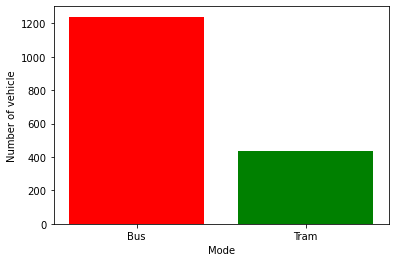

We can see Wroclaw has only Buses, Trams
Number of Stops (BUS) : 1239
Number of Stops (TRAM) : 434


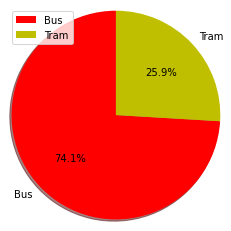

We can observe that buses occupy 74.1% of the transportation modes in Wroclaw, while trams have a share of 24.9% .


In [79]:
b= wroclawDataFrame['name'].unique()
a = wroclawDataFrame.groupby('Betriebszweig')['Haltepunkt'].nunique()
left = [1, 2]
height = a
tick_label = ['Bus', 'Tram']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.xlabel('Mode')
plt.ylabel('Number of vehicle')
plt.show()
print("We can see Wroclaw has only Buses, Trams")  
print("Number of Stops (BUS) :", a[0])  
print("Number of Stops (TRAM) :", a[1])  
modes = ['Bus', 'Tram']
slices = a
colors = ['r', 'y']
plt.pie(slices, labels = modes, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.legend()
plt.show()
print("We can observe that buses occupy 74.1% of the transportation modes in Wroclaw, while trams have a share of 24.9% .")  


### 7. Comparison of the modes of transport in both cities.

To have a closer look at the comparison, I have plotted the data of vehicle types in both cities on a bar chart. This allows for a visual comparison of the different types of vehicles used in Nuremberg and Wroclaw.

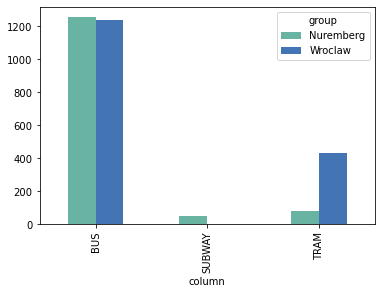

Comparasion of Bus stops
Number of Stops in nuremberg : 1257
Number of Stops in wroclaw : 1239


Comparasion of Tram stops
Number of Stops in nuremberg : 80
Number of Stops in wroclaw : 434


Comparasion of Subway stops
Number of Stops in nuremberg : 48
Number of Stops in wroclaw : 0




In [94]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame([['Nuremberg',"BUS",aa[0]],['Nuremberg','TRAM',aa[1]],['Nuremberg','SUBWAY',aa[2]],['Wroclaw','BUS',a[0]],
                   ['Wroclaw','TRAM',a[1]],['Wroclaw','SUBWAY',0]],columns=['group','column','val'])
data.pivot("column", "group", "val").plot(kind='bar')
plt.show()

print("Comparasion of Bus stops")
print("Number of Stops in nuremberg :", aa[0]) 
print("Number of Stops in wroclaw :", a[0]) 
print("\n")
print("Comparasion of Tram stops")
print("Number of Stops in nuremberg :", aa[1])  
print("Number of Stops in wroclaw :", a[1]) 
print("\n")
print("Comparasion of Subway stops")
print("Number of Stops in nuremberg :", aa[2])
print("Number of Stops in wroclaw :", "0")
print("\n")

 

We can observe that bus connections are nearly equal in both cities. However, there is a significant difference in the number of tram stops, with Wroclaw having more tram availability compared to Nuremberg. On the other hand, Nuremberg has subway systems that Wroclaw does not have. This makes Nuremberg more accessible in terms of public transport, despite having fewer trams but the presence of subways.

### 8. Visualization of the stops on the map of both cities.

I have used Plotly to plot the latitude and longitude of the stops on a map, allowing for a visual representation that provides additional insights into the distribution and locations of the stops in both cities.

Nuremberg


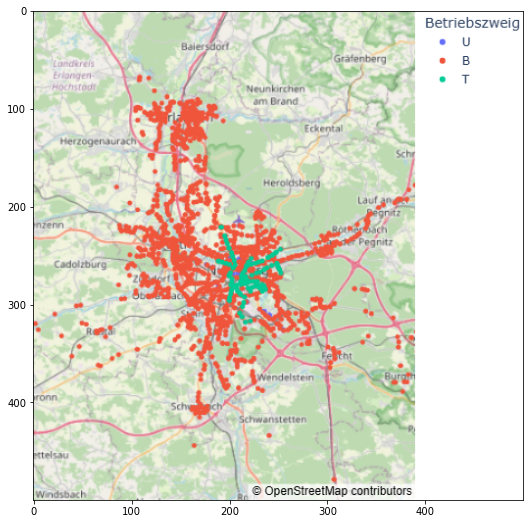

Wroclaw


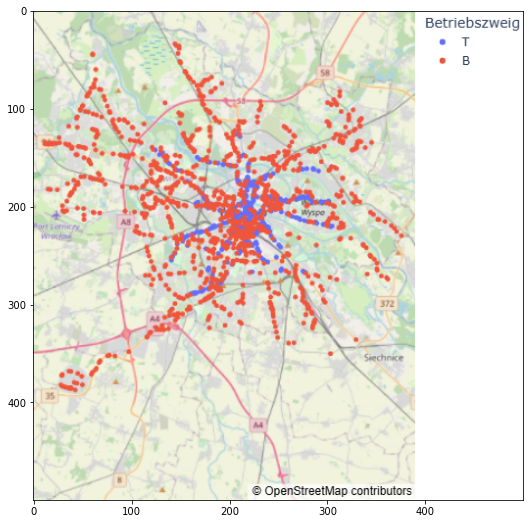

In [122]:
import kaleido
import plotly.io as pio
pio.renderers.default = "notebook_connected"
init_notebook_mode(connected=True)

import plotly.express as px
import plotly.express as px2 
print("Nuremberg")
color_scale = [(0, 'purple'), (1,'green')]
fig = px.scatter_mapbox(nurembergDataFrame, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="Betriebszweig", 
                        hover_data=["Betriebszweig"],
                        color="Betriebszweig",
                        color_continuous_scale=color_scale,
                        
                        zoom=9, 
                        height=500,
                        width=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
image = mpimg.imread("newplot1.png")
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(image)
plt.show()

print("Wroclaw")
color_scale = [(0, 'purple'), (1,'green')]
fig2 = px2.scatter_mapbox(wroclawDataFrame, 
                        mapbox_style="open-street-map",
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="Betriebszweig", 
                        hover_data=["Betriebszweig"],
                        color="Betriebszweig",
                        color_continuous_scale=color_scale,
                        zoom=9, 
                        height=500,
                        width=500)
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()
image = mpimg.imread("newplot2.png")
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(image)
plt.show()


<p>On the map, we can observe that Nuremberg has a concentration of tram stops in the city center, which is complemented by its subway system extending throughout the city. Nuremberg also boasts a well-connected bus network that reaches out to places like Erlangen, Schwabach, Furth, and other outskirts. This results in a comprehensive and efficient public transportation system. Conversely, Wroclaw does not have subways, but it compensates with an expanded tram network that covers various areas of the city. Additionally, Wroclaw has a comprehensive bus network that further enhances its connectivity.<p>

### 9. Conclusion

In conclusion, Nuremberg offers buses, trams, and subways, with buses being the dominant mode of transport. The city has a good public transportation system with many buses, trams, and subways. The buses are well-connected and go to different places.  concentrated tram stops in the city center, and subway lines extending throughout. On the other hand, Wroclaw has buses and trams, with a higher percentage of trams compared to Nuremberg. While lacking a subway system, Wroclaw compensates with an extensive tram network that covers various areas. The comparison highlights Nuremberg's accessibility through its diverse transport options and emphasizes the importance of understanding public transport infrastructure in urban planning.